In [5]:
import matplotlib.style
matplotlib.style.use('classic')
#import matplotlib
#matplotlib.use("pdf")
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import shapefile as shp


In [6]:
K = np.loadtxt( 'params_COL/K_Colombia_pu.txt' )
P = np.loadtxt( 'params_COL/P_Colombia_pu.txt' )
positions = np.loadtxt( 'params_COL/Node_Location.txt' )

In [7]:
data = pd.read_excel('params_COL/ESTACIONES-EN-COLOMBIA (1).xlsx')

In [106]:
color_nodes = np.array( ['gold' for i in range(len(P))], dtype=object )

In [107]:
color_nodes[data['TIPO ESTACION'] == 'H'] = 'deepskyblue'
color_nodes[data['TIPO ESTACION'] == 'T'] = 'crimson'

In [108]:
legend_nodes = np.array( ['Consumer' for i in range(len(P))], dtype=object )
legend_nodes[data['TIPO ESTACION'] == 'H'] = 'Hydroelectric power station'
legend_nodes[data['TIPO ESTACION'] == 'T'] = 'Thermal power station'

In [109]:
G = nx.from_numpy_matrix(K)

In [110]:
sf = shp.Reader("params_COL/COL_adm/COL_adm1.shp")

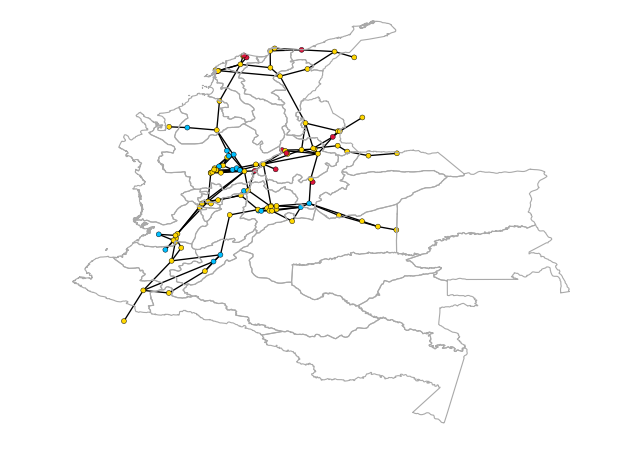

In [111]:
plt.figure()
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y, color = 'darkgrey')

nx.draw( G, pos = positions, node_size = 20, node_color = color_nodes, \
        linewidths = 0.4, width = 1.2)#, labels = label_node, font_size = 4 )
#plt.axis('on')
plt.xlim([-80, -66])
plt.ylim([-5, 13])
plt.tight_layout()
plt.savefig('Images_2/colombian_graph.pdf')
plt.show()

In [112]:
label_node = dict()
for keyv in np.arange(0, 102, 1):
    label_node[keyv] = keyv

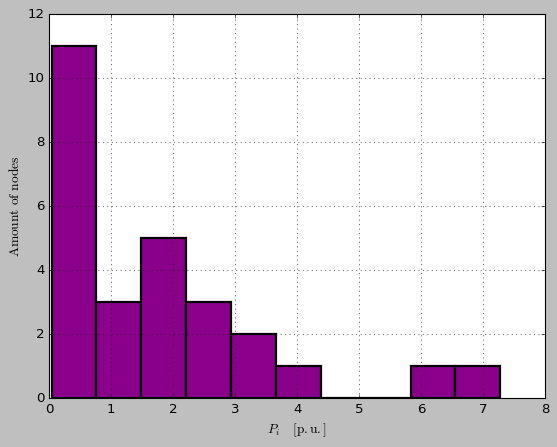

In [160]:
P_gens = P[P>0]
plt.figure()
plt.hist(P_gens, bins = 10, color = 'darkmagenta', linewidth = 2, alpha = 1)
plt.grid()
plt.xlabel(r'$P_i$'  + '   ' + r'$\rm{[p.u.]}$')
plt.ylabel(r'$\rm{Amount}$' + ' ' + r'$\rm{of}$' + ' ' + r'$\rm{nodes}$')
plt.savefig('Images_2/Hist_col_P.pdf')
plt.show()

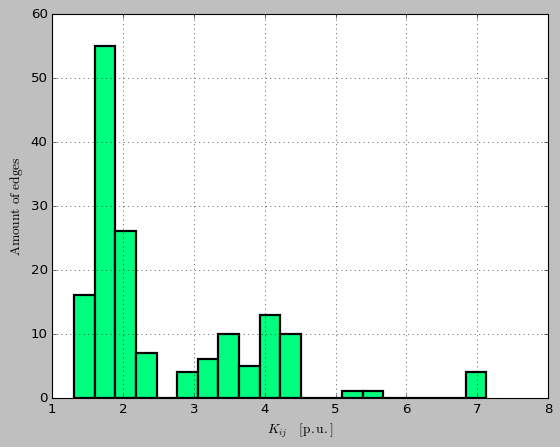

In [157]:
K2 = K[np.triu_indices(102)]

K2 = K2[K2 > 0]

plt.figure()
plt.hist(K2, bins = 20, color = 'springgreen', linewidth = 2, alpha = 1)
plt.grid()
plt.xlabel(r'$K_{ij}$'  + '   ' + r'$\rm{[p.u.]}$')
plt.ylabel(r'$\rm{Amount}$' + ' ' + r'$\rm{of}$' + ' ' + r'$\rm{edges}$')
plt.savefig('Images_2/Hist_col_K.pdf')
#plt.yscale('log')
plt.show()

In [140]:
K[np.triu_indices(102)].shape

(5253,)

In [165]:
np.sum(P)

-1.2656542480726785e-14

In [166]:
np.sum(K>0)

316